# Add Report

This example demonstrates how to add a PDF and an image report to an HDF5 group and extract them.  Having this information can be useful for archiving.  


In [1]:
from pathlib import Path
from mth5.mth5 import MTH5


## Add Text File

Here we will add a simple text file as a report. Text files accepted are currently

- `txt`
- `pdf`
- `md`

In [2]:
with MTH5() as m:
    m.open_mth5("example.mth5", mode="a")
    report_path = Path().cwd().joinpath("example_report.txt")
    with open(report_path, "w") as f:
        f.write("This is an example report.")
    m.reports_group.add_report(
        report_name="example_text_file",
        report_metadata={
            "description": "A simple report as a text file",
        },
        filename=report_path,
    )
    print(m)

2026-01-27T21:33:56.741682-0800 | INFO | mth5.mth5 | _initialize_file | line: 773 | Initialized MTH5 0.2.0 file example.mth5 in mode a
/:
    |- Group: Experiment
    --------------------
        |- Group: Reports
        -----------------
            --> Dataset: example_text_file
            ................................
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Surveys
        -----------------
        --> Dataset: channel_summary
        ..............................
        --> Dataset: fc_summary
        .........................
        --> Dataset: tf_summary
        .........................
2026-01-27T21:33:56.786725-0800 | INFO | mth5.mth5 | close_mth5 | line: 899 | Flushing and closing example.mth5


## Add Image

Here's an example of how to add an image.

Accepted images are:

- `png`
- `jpg`
- `jpeg`
- `tif`
- `tiff`
- `bmp`

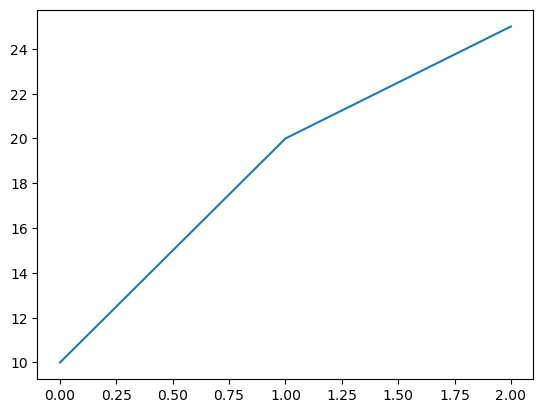

In [3]:
# create example image
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1, 2], [10, 20, 25])
image_path = Path().cwd().joinpath("example_figure.png")
fig.savefig(image_path)

In [4]:
with MTH5() as m:
    m.open_mth5("example.mth5", mode="a")
    m.reports_group.add_report(
        report_name="example_figure",
        report_metadata={ # supplying metadata is optional
            "description": "An example figure saved as a PNG file",
        },
        filename=image_path,
    )
    print(m)

/:
    |- Group: Experiment
    --------------------
        |- Group: Reports
        -----------------
            --> Dataset: example_figure
            .............................
            --> Dataset: example_text_file
            ................................
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Surveys
        -----------------
        --> Dataset: channel_summary
        ..............................
        --> Dataset: fc_summary
        .........................
        --> Dataset: tf_summary
        .........................
2026-01-27T21:33:57.023085-0800 | INFO | mth5.mth5 | close_mth5 | line: 899 | Flushing and closing example.mth5


## Retrieve Reports

Now what if you want to get the report back.  The data are stored as a binary array which is not very useful.  So there is an option to write to a file in `get_report` that will write the array to the appropriate file.  The `dataset` is also returned so if you don't want to write to a file, you can inspect the dataset.

In [6]:
with MTH5() as m:
    m.open_mth5("example.mth5", mode="a")
    text_ds = m.reports_group.get_report("example_text_file", write=True)
    figure_ds = m.reports_group.get_report("example_figure", write=True)

2026-01-27T21:35:02.783678-0800 | INFO | mth5.groups.reports | get_report | line: 160 | Report extracted to c:\Users\peaco\OneDrive\Documents\GitHub\mth5\docs\examples\notebooks\example_report.txt
2026-01-27T21:35:02.815284-0800 | INFO | mth5.groups.reports | get_report | line: 168 | Image report extracted to c:\Users\peaco\OneDrive\Documents\GitHub\mth5\docs\examples\notebooks\example_figure.png
2026-01-27T21:35:02.821287-0800 | INFO | mth5.mth5 | close_mth5 | line: 899 | Flushing and closing example.mth5


In [7]:
with MTH5() as m:
    m.open_mth5("example.mth5", mode="a")
    text_ds = m.reports_group.get_report("example_text_file", write=False)
    figure_ds = m.reports_group.get_report("example_figure", write=False)

    print("Text file attributes:")
    print("\n".join([f"{k} = {v}" for k, v in text_ds.attrs.items()]))

    print("\nFigure file attributes:")
    print("\n".join([f"{k} = {v}" for k, v in figure_ds.attrs.items()]))

Text file attributes:
creation_time = 1769576723.3951802
description = A simple report as a text file
file_type = txt
filename = example_report.txt

Figure file attributes:
creation_time = 1769577496.5228226
description = An example figure saved as a PNG file
file_type = png
filename = example_figure.png
2026-01-27T21:35:08.819192-0800 | INFO | mth5.mth5 | close_mth5 | line: 899 | Flushing and closing example.mth5
